In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [122]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [2]:
df=pd.read_csv("../data/card_transactions.csv")

In [3]:
df.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [22]:
df[df.credit_limit.isnull()]

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
7898,c2AkRIIj9f7hgiXZ,18.400472,0.0,186.853063,0.0,0.166667,0.0,0.0,0.0,0.0,0.166667,1,0,NaN,6,9.040017,14.418723,0.0


In [26]:
df=df.drop(7898,axis=0)

In [27]:
df.isnull().sum()

customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          0
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

<AxesSubplot:>

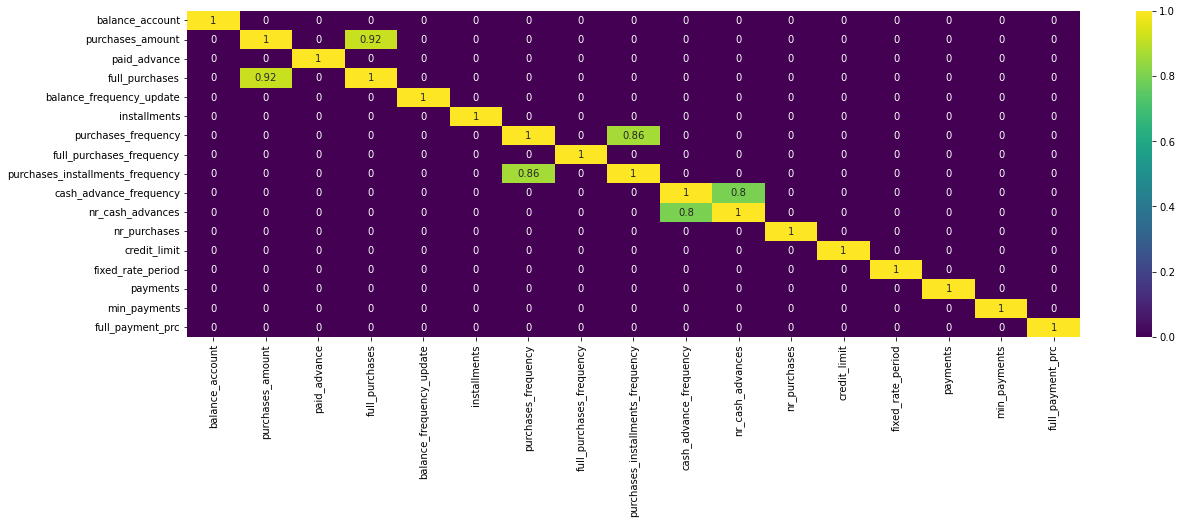

In [36]:
fig, ax = plt.subplots(figsize=(20, 6)) 
r=df.corr()
r[abs(r) <= 0.75] = 0 
sns.heatmap(r, ax=ax, annot=True,cmap = 'viridis')

## KNN imputing

In [82]:
pipeline_knn = Pipeline(steps=[
#                                      ("knn_imputer", KNNImputer(n_neighbors=5)),
                                      ("scaler", StandardScaler()),
#                                      ("model", KNeighborsClassifier()),
                                        ("model", KNeighborsRegressor())
                                      ])

pipeline_knn

Pipeline(steps=[('scaler', StandardScaler()), ('model', KNeighborsRegressor())])

In [47]:
X_test=df[df.min_payments.isnull()].drop(columns="min_payments")

In [50]:
X_train=df[~df.min_payments.isnull()].drop(columns="min_payments")

In [54]:
y_train=df.min_payments[~df.min_payments.isnull()]

In [64]:
y_train2=pd.DataFrame(y_train)

In [93]:
X_test.reset_index()

,index,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,full_payment_prc
0,24,Hik1ahI9PjnV7wHy,463.071440,1817.84,0.000000,1817.84,1.000000,0.00,0.333333,0.333333,0.000000,0.000000,0,4,6000.0,12,0.000000,0.0
1,27,xErcXVe5RtT8Z558,28.329892,292.59,0.000000,292.59,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0,12,5000.0,12,0.000000,0.0
2,29,C9WDDshw5YIAvH0c,0.000000,240.10,0.000000,0.00,0.000000,240.10,0.583333,0.000000,0.583333,0.000000,0,7,2500.0,12,0.000000,0.0
3,38,sYAP5BgHHjmvJ5XO,61.463647,0.00,989.053104,0.00,0.166667,0.00,0.000000,0.000000,0.000000,0.166667,2,0,1200.0,6,0.000000,0.0
4,56,ho8zNMNjqV2lBy0t,253.143106,0.00,3351.385591,0.00,0.142857,0.00,0.000000,0.000000,0.000000,0.142857,3,0,5000.0,7,0.000000,0.0
5,68,zZ6IZlH0ay9ywpg9,0.000000,0.00,147.241855,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.090909,1,0,500.0,11,667.921811,0.0
6,83,vh3hYE1D2G1cEp4J,323.801713,0.00,1430.485333,0.00,0.333333,0.00,0.000000,0.000000,0.000000,0.166667,1,0,1500.0,6,0.000000,0.0
7,102,j7SKYdhyuESZxyXu,3.574463,576.00,0.000000,0.00,0.818182,576.00,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,12,498.788091,0.0
8,107,7WdEyp0VDyVj46Np,0.000000,147.00,0.000000,0.00,0.000000,147.00,1.000000,0.000000,1.000000,0.000000,0,12,2500.0,12,152.109132,0.0
9,130,rB4Rxm7SLKI4mfJE,0.000000,990.00,0.000000,0.00,0.000000,990.00,0.818182,0.000000,0.818182,0.000000,0,9,1500.0,11,0.000000,0.0


In [83]:
pipeline_knn.fit(X_train.drop(columns=("customer_id")), y_train2)

y_pred = pipeline_knn.predict(X_test.drop(columns=("customer_id")))

In [95]:
X_test["min_payments"]=y_pred

In [102]:
X_test.head(2)

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,full_payment_prc,min_payments
24,Hik1ahI9PjnV7wHy,463.071440,1817.84,0.0,1817.84,1.0,0.0,0.333333,0.333333,0.0,0.0,0,4,6000.0,12,0.0,0.0,264.587841
27,xErcXVe5RtT8Z558,28.329892,292.59,0.0,292.59,1.0,0.0,1.000000,1.000000,0.0,0.0,0,12,5000.0,12,0.0,0.0,184.035015


In [103]:
df[~df.min_payments.isnull()].head(2)

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.6,0.0,0.0,0.909091,107.6,0.909091,0.0,0.818182,0.0,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.3,0.0,0.0,1.000000,150.3,1.000000,0.0,0.833333,0.0,0,6,1000.0,6,54.722514,82.955180,0.000000


In [104]:
df_knn=pd.concat([df[~df.min_payments.isnull()],X_test])

In [107]:
df_knn.to_csv("card_transactions_knn_impute.csv",sep=',',index=False)

## finding groups

<AxesSubplot:>

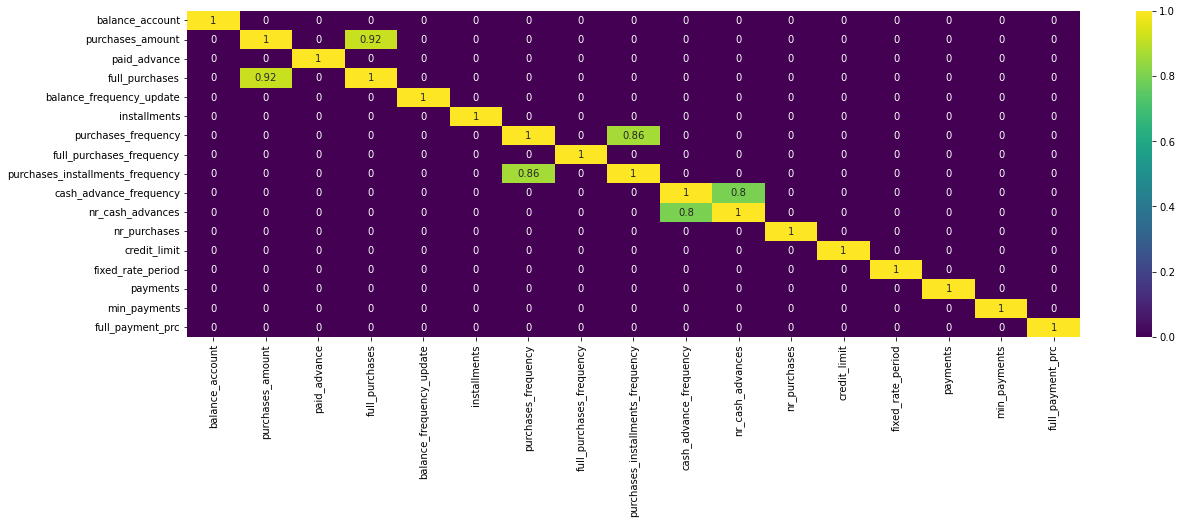

In [108]:
fig, ax = plt.subplots(figsize=(20, 6)) 
r=df_knn.corr()
r[abs(r) <= 0.75] = 0 
sns.heatmap(r, ax=ax, annot=True,cmap = 'viridis')

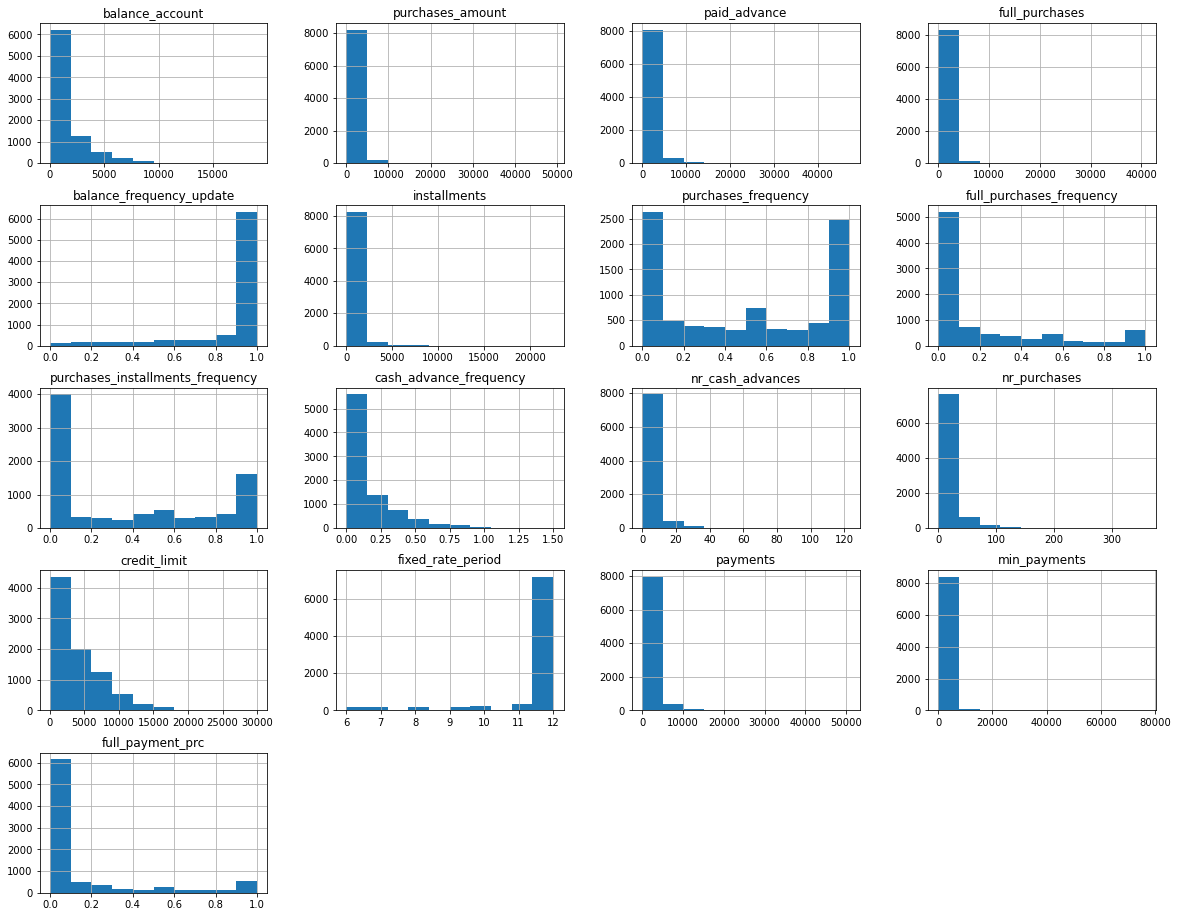

In [132]:
df_knn.hist(figsize=(20, 16));

In [135]:
df.min_payments.max()

76406.20752000001

In [134]:
df_knn.min_payments.max()

76406.20752000001

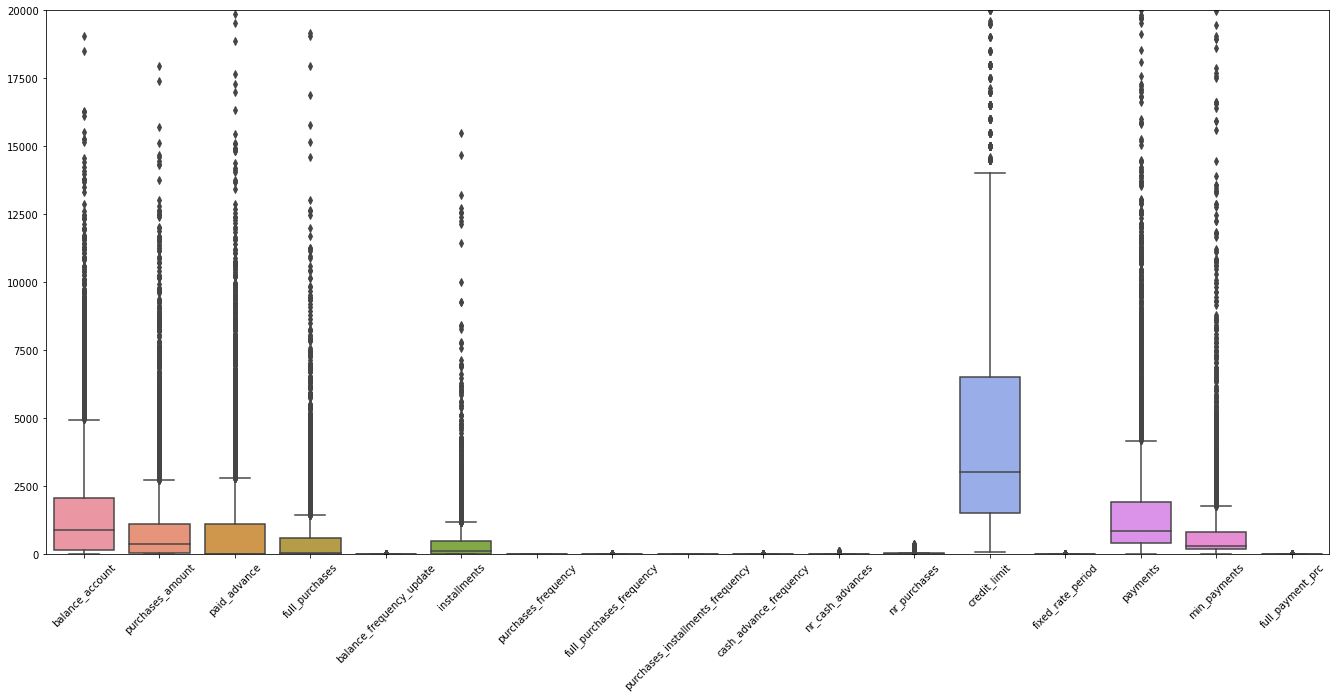

In [142]:
fig, ax= plt.subplots(figsize=(23, 10) )
sns.boxplot(data=df_knn,ax=ax,)
plt.ylim([0, 20000]); #specify range, only values from 0 to 200 in this case
plt.xticks(rotation=45);

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline

In [126]:
cluster_errors = []

for n_clusters in range(1, 20):
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()), ## scale data
        ("cluster", KMeans(n_clusters=n_clusters, random_state=17, verbose=0))])
    kmeans_pipeline.fit(df_knn.drop(columns=("customer_id")))
    #kmeans_pipeline.predict(df)
    wcsse = kmeans_pipeline.named_steps["cluster"].inertia_
    print('K = ', n_clusters, '\tWCSS Err. = ', wcsse)
    cluster_errors.append(wcsse)

K =  1 	WCSS Err. =  144483.00000000006
K =  2 	WCSS Err. =  121460.32428832514
K =  3 	WCSS Err. =  106411.69744612306
K =  4 	WCSS Err. =  94091.0437533909
K =  5 	WCSS Err. =  86676.93672550487
K =  6 	WCSS Err. =  80384.86574394607
K =  7 	WCSS Err. =  75459.10083230876
K =  8 	WCSS Err. =  70562.32073354
K =  9 	WCSS Err. =  67400.63243164142
K =  10 	WCSS Err. =  62987.9931566286
K =  11 	WCSS Err. =  60335.04161390519
K =  12 	WCSS Err. =  58160.2485993642
K =  13 	WCSS Err. =  56090.70600135446
K =  14 	WCSS Err. =  54433.27723193441
K =  15 	WCSS Err. =  53159.45846663012
K =  16 	WCSS Err. =  51625.00128105818
K =  17 	WCSS Err. =  50456.09505130622
K =  18 	WCSS Err. =  49316.79735984791
K =  19 	WCSS Err. =  47981.29097490472


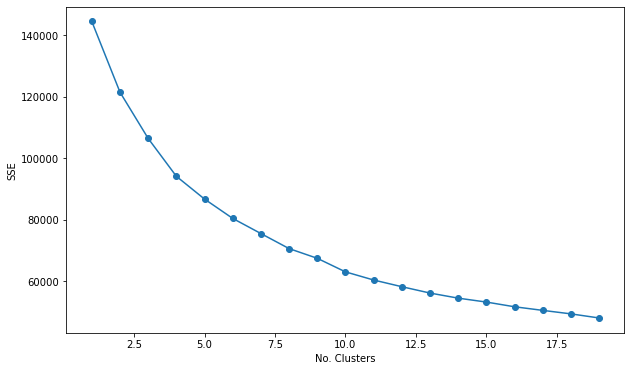

In [128]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), cluster_errors, "o-" )
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.show()  ## based on this graph we should choose (around) 4 clusters

In [125]:
cluster_errors_mima = []

for n_clusters in range(1, 20):
    kmeans_pipeline = Pipeline([
        ("scaler", MinMaxScaler()), ## scale data
        ("cluster", KMeans(n_clusters=n_clusters, random_state=17, verbose=0))])
    kmeans_pipeline.fit(df_knn.drop(columns=("customer_id")))
    #kmeans_pipeline.predict(df)
    wcsse = kmeans_pipeline.named_steps["cluster"].inertia_
    print('K = ', n_clusters, '\tWCSS Err. = ', wcsse)
    cluster_errors_mima.append(wcsse)

K =  1 	WCSS Err. =  5628.842037153605
K =  2 	WCSS Err. =  3328.4689833024186
K =  3 	WCSS Err. =  2780.2170709635225
K =  4 	WCSS Err. =  2421.79313909482
K =  5 	WCSS Err. =  2149.471638689123
K =  6 	WCSS Err. =  1951.4119465984145
K =  7 	WCSS Err. =  1766.1668062121264
K =  8 	WCSS Err. =  1616.148956770589
K =  9 	WCSS Err. =  1492.7265104147418
K =  10 	WCSS Err. =  1383.7124508956795
K =  11 	WCSS Err. =  1286.6453068583717
K =  12 	WCSS Err. =  1222.5329687239312
K =  13 	WCSS Err. =  1169.3993447944752
K =  14 	WCSS Err. =  1121.7947095602565
K =  15 	WCSS Err. =  1090.7595947094092
K =  16 	WCSS Err. =  1048.312587857808
K =  17 	WCSS Err. =  1012.0103452675107
K =  18 	WCSS Err. =  978.799342969673
K =  19 	WCSS Err. =  968.7278592949222


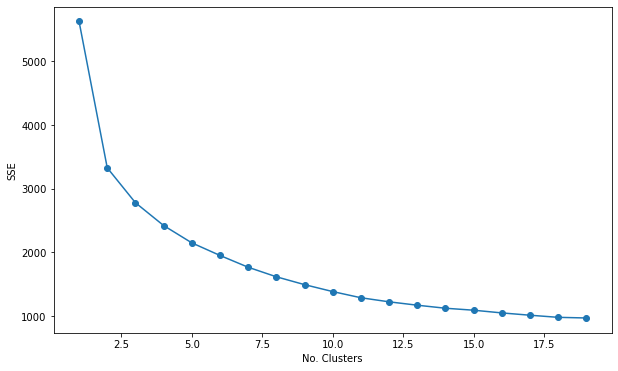

In [131]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), cluster_errors_mima, "o-" )
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.show()  ## based on this graph we should choose (around) 4 clusters

For n_clusters = 2 The average silhouette_score is : 0.0738
For n_clusters = 3 The average silhouette_score is : 0.3415
For n_clusters = 4 The average silhouette_score is : 0.0485
For n_clusters = 5 The average silhouette_score is : -0.0013
For n_clusters = 6 The average silhouette_score is : 0.0045
For n_clusters = 7 The average silhouette_score is : -0.0618
For n_clusters = 8 The average silhouette_score is : -0.0657
For n_clusters = 9 The average silhouette_score is : -0.0539
For n_clusters = 10 The average silhouette_score is : -0.0674
For n_clusters = 11 The average silhouette_score is : -0.0569
For n_clusters = 12 The average silhouette_score is : -0.0625
For n_clusters = 13 The average silhouette_score is : -0.0604
For n_clusters = 14 The average silhouette_score is : -0.0656


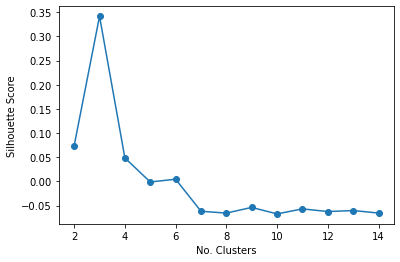

In [147]:
# silhouette using Standard Scaler

silhouette_s = []

for n_clusters in range(2, 15):
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters))])
    
    cluster_labels = kmeans_pipeline.fit_predict(df_knn.drop(columns=("customer_id")))
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df_knn.drop(columns=("customer_id")), cluster_labels).round(4))
    silhouette_s.append(silhouette_score(df_knn.drop(columns=("customer_id")), cluster_labels))
    
plt.plot(range(2, 15),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.0512
For n_clusters = 3 The average silhouette_score is : -0.0087
For n_clusters = 4 The average silhouette_score is : -0.0651
For n_clusters = 5 The average silhouette_score is : -0.0715
For n_clusters = 6 The average silhouette_score is : -0.1079
For n_clusters = 7 The average silhouette_score is : -0.127
For n_clusters = 8 The average silhouette_score is : -0.1179
For n_clusters = 9 The average silhouette_score is : -0.1348
For n_clusters = 10 The average silhouette_score is : -0.1301
For n_clusters = 11 The average silhouette_score is : -0.1962
For n_clusters = 12 The average silhouette_score is : -0.1494
For n_clusters = 13 The average silhouette_score is : -0.2203
For n_clusters = 14 The average silhouette_score is : -0.2242


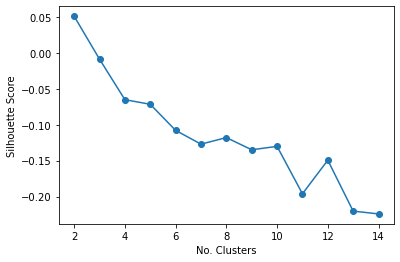

In [146]:
#using MinMax Scaler
silhouette_s = []

for n_clusters in range(2, 15):
    kmeans_pipeline = Pipeline([
        ("scaler", MinMaxScaler()),
        ("cluster", KMeans(n_clusters=n_clusters))])
    
    cluster_labels = kmeans_pipeline.fit_predict(df_knn.drop(columns=("customer_id")))
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df_knn.drop(columns=("customer_id")), cluster_labels).round(4))
    silhouette_s.append(silhouette_score(df_knn.drop(columns=("customer_id")), cluster_labels))
    
plt.plot(range(2, 15),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

## K Means

In [149]:
# 5 clusters
kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=5, random_state=17, verbose=0))])
kmeans_pipeline.fit(df_knn.drop(columns=("customer_id")))
clusters = kmeans_pipeline.predict(df_knn.drop(columns=("customer_id")))
df_knn['Cluster'] = clusters
df_knn.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,Cluster
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,4
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,4
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,1
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,3
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,1


In [150]:
df_knn['Cluster'].value_counts()

1    3712
4    2286
3    1319
2    1104
0      78
Name: Cluster, dtype: int64

In [183]:
df_knn.drop(columns=["customer_id","Cluster"]).columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc'],
      dtype='object')

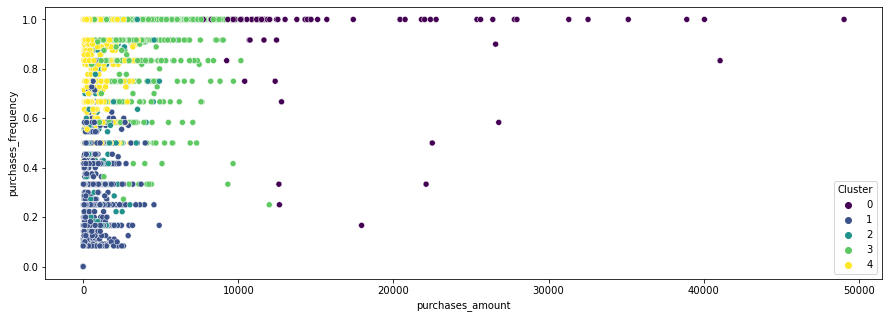

In [215]:
fig, ax= plt.subplots(figsize=(15, 5) )
sns.scatterplot(x=df_knn['purchases_amount'], y=df_knn['purchases_frequency'], hue=df_knn['Cluster'],palette = 'viridis', ax=ax);

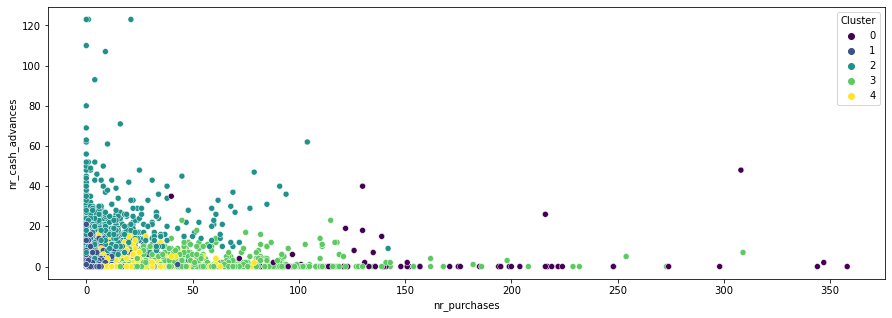

In [214]:
fig, ax= plt.subplots(figsize=(15, 5) )
sns.scatterplot(x=df_knn['nr_purchases'], y=df_knn['nr_cash_advances'], hue=df_knn['Cluster'],palette = 'viridis', ax=ax);

In [171]:
len(df_knn.columns)

19

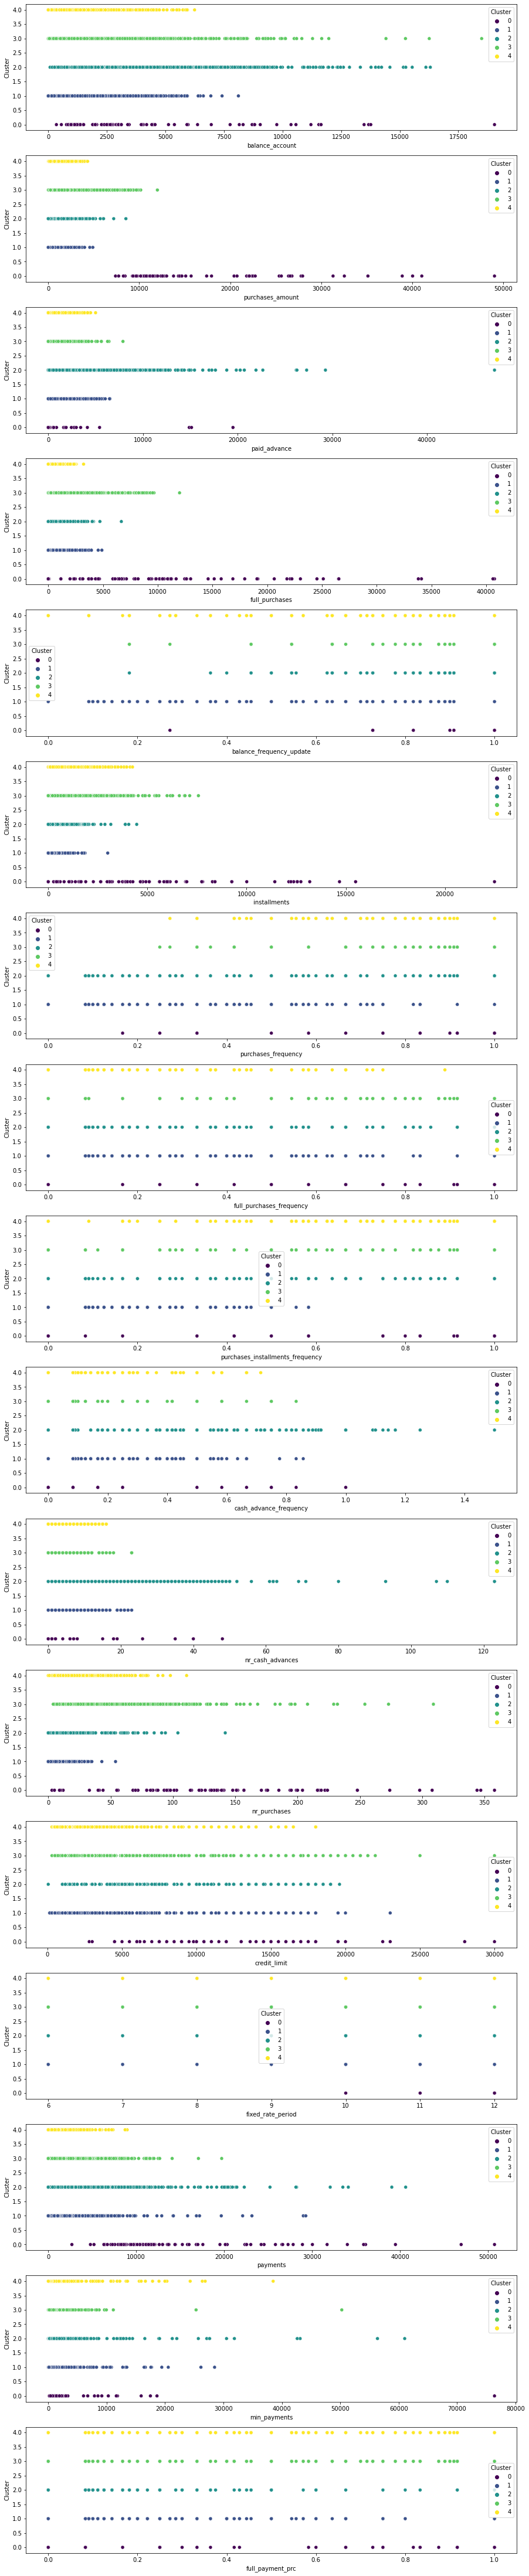

In [190]:
fig, ax= plt.subplots(17,figsize=(15, 80) )
for i, col in enumerate(df_knn.drop(columns=["customer_id","Cluster"]).columns):
    sns.scatterplot(x=df_knn[col], y=df_knn['Cluster'], hue=df_knn['Cluster'],palette = 'viridis', ax=ax[i]);

In [200]:
# 4 clusters
kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=4, random_state=17, verbose=0))])
kmeans_pipeline.fit(df_knn.drop(columns=("customer_id")))
clusters2 = kmeans_pipeline.predict(df_knn.drop(columns=("customer_id")))
df_knn['Cluster2'] = clusters2
df_knn.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,Cluster,Cluster2
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,4,1
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,4,1
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,1,0
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,3,1
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,1,0


In [210]:
df_knn.Cluster2.value_counts()

0    3712
1    3280
2    1125
3     382
Name: Cluster2, dtype: int64

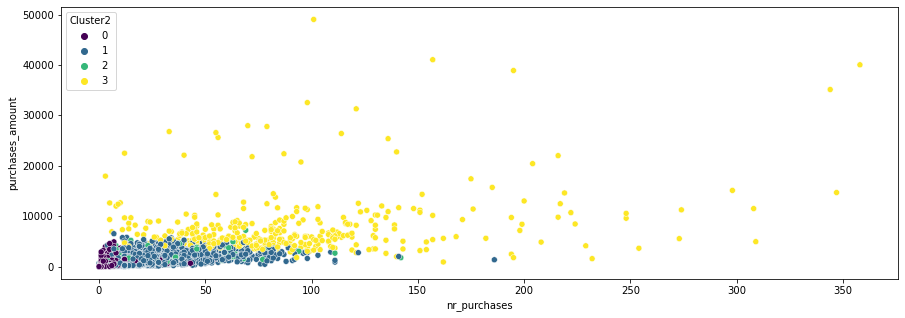

In [203]:
fig, ax= plt.subplots(figsize=(15, 5) )
sns.scatterplot(x=df_knn['nr_purchases'], y=df_knn['purchases_amount'], hue=df_knn['Cluster2'],palette = 'viridis', ax=ax);

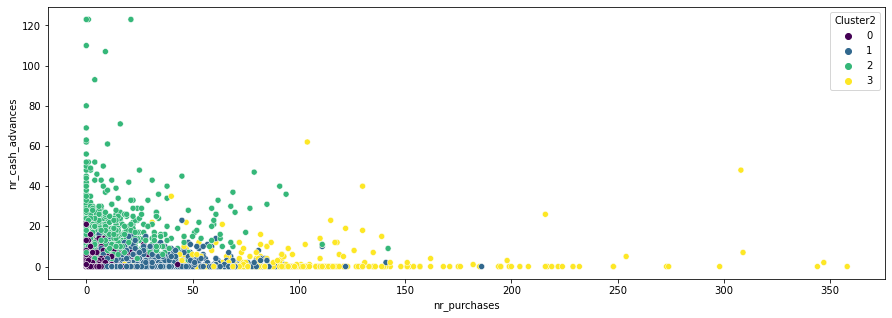

In [204]:
fig, ax= plt.subplots(figsize=(15, 5) )
sns.scatterplot(x=df_knn['nr_purchases'], y=df_knn['nr_cash_advances'], hue=df_knn['Cluster2'],palette = 'viridis', ax=ax);

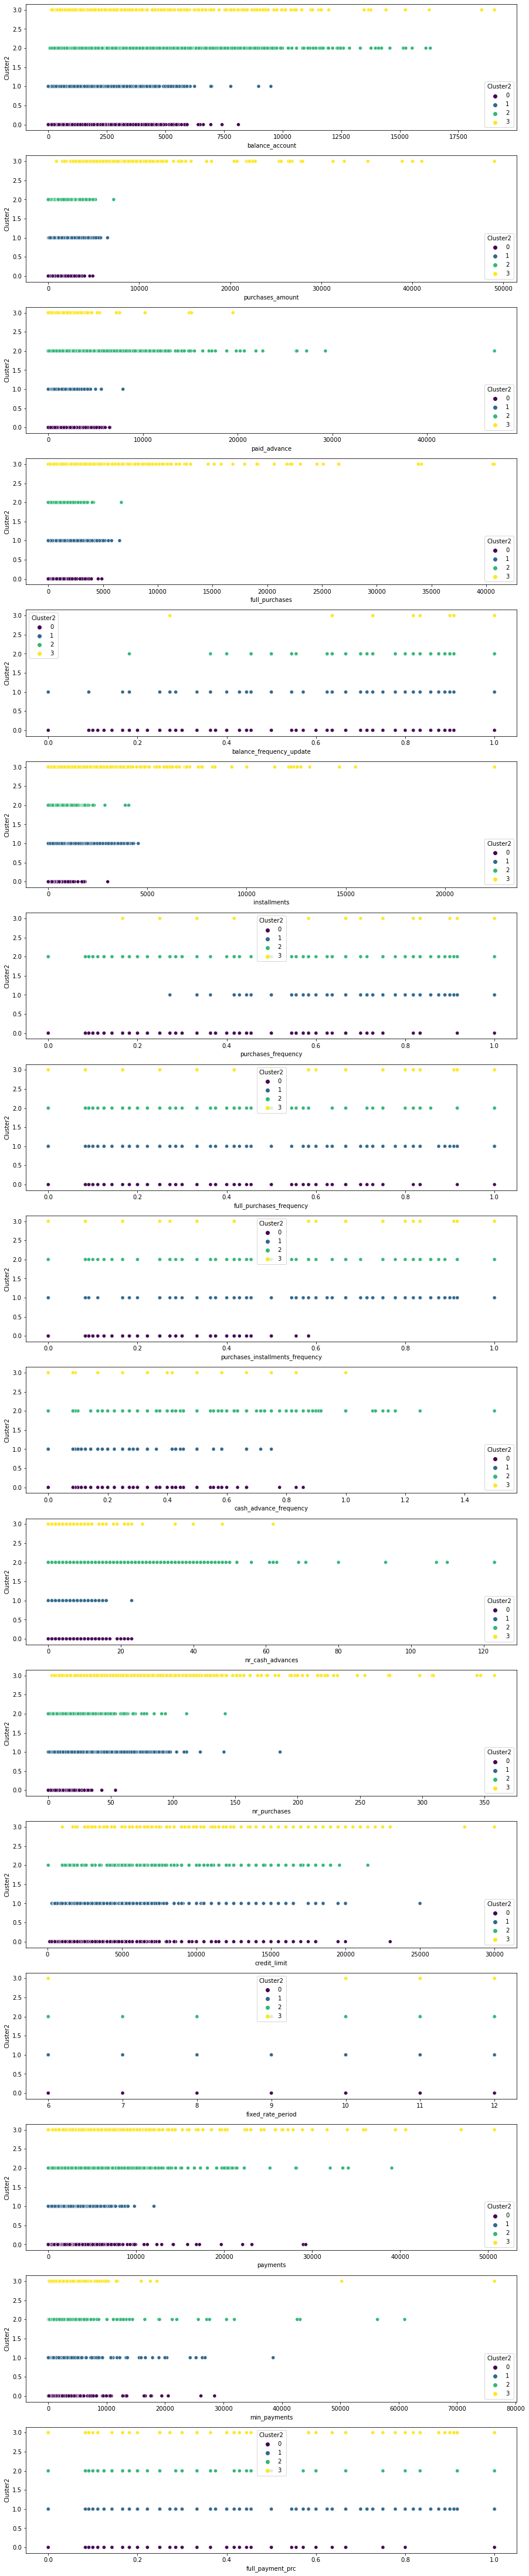

In [207]:
fig, ax= plt.subplots(17,figsize=(15, 80) )
for i, col in enumerate(df_knn.drop(columns=["customer_id","Cluster","Cluster2"]).columns):
    sns.scatterplot(x=df_knn[col], y=df_knn['Cluster2'], hue=df_knn['Cluster2'],palette = 'viridis', ax=ax[i]);